Created by : Yuliana Theresa<br/>
[Link tableu](https://public.tableau.com/app/profile/yuliana.theresa/viz/h8dsft_Milestone1_yuliana-theresa/Dashboard2?publish=yes)

# **Worldwide Coffee Habits**

# Background

Dewasa ini banyak sekali orang-orang yang menyukai kopi. Entah saat bekerja atau hanya sekedar menemani diskusi panjang dengan kolega terdekat. Fenomena ini pun tidak hanya terjadi di Indonesia, tapi juga orang-orang dari seluruh dunia. Trend kopi ini juga bisa dimanfaatkan oleh kalangan *business man* untuk memperluas ekspansi penjualan kopinya sampai ke mancanegara. Sebagai *market analyst*, kami akan mengumpulkan, menganalisis serta melakukan visualisasi data menggunakan tableau tentang kebiasaan minum kopi di seluruh dunia sebagai bahan pertimbangan untuk membuat keputusan bisnis akan trend ini

**Business Problem Understanding**

Dari kebiasaan minum kopi kebanyakan orang, dapat mempengaruhi penjualan kopi itu sendiri. Disini kami akan mengamati kebiasaan tersebut dari tahun 2000 hingga 2023 sehingga kami dapat memberikan opsi negara yang memiliki potensi *sales* yang tinggi untuk penjualan kopi, polanya adalah sebagai berikut :

1. Berapa jumlah dan rata-rata kilogram kopi yang dikonsumsi pertahunnya disetiap negara? 
2. Berapa rata-rata USD yang dikeluarkan untuk setiap kilogram kopi yang dikonsumsi disetiap negara?
3. Setiap orang di negara tertentu memiliki kebiasaan untuk meminum berbagai jenis kopi, apa saja itu?
4. Jenis kopi apa yang paling banyak dikonsumsi orang-orang seluruh dunia?
5. Berapa USD maksimum yang mau dikeluarkan oleh orang-orang untuk mengonsumsi kopi?
6. Apakah ada hubungannya antara negara-negara tertentu dengan jenis kopi yang dikonsumsi?

Hal pertama yang akan kami lakukan adalah pengumpulan dan penarikan data

# Import Libraries

In [1]:
# Import library
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
from scipy import stats

# Data Loading

In [2]:
# Load data

df = pd.read_csv('worldwide_coffee_habits.csv')

In [3]:
df

,Country,Year,Coffee Consumption (kg per capita per year),Average Coffee Price (USD per kg),Type of Coffee Consumed,Population (millions)
0,Country_39,2023,9.253939,6.467453,Americano,65.929478
1,Country_29,2011,9.981203,4.346744,Mocha,82.456680
2,Country_15,2020,3.312916,8.767496,Latte,110.938862
3,Country_43,2005,2.436180,11.748750,Espresso,43.137207
4,Country_8,2019,4.637849,8.999099,Mocha,65.484262
...,...,...,...,...,...,...
9995,Country_26,2013,6.107139,11.553694,Mocha,95.808370
9996,Country_22,2013,7.848531,14.844245,Americano,121.098306
9997,Country_31,2019,2.152059,5.516845,Americano,97.327529
9998,Country_43,2012,5.715941,4.641472,Cappuccino,33.916437


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Country                                      10000 non-null  object 
 1   Year                                         10000 non-null  int64  
 2   Coffee Consumption (kg per capita per year)  10000 non-null  float64
 3   Average Coffee Price (USD per kg)            10000 non-null  float64
 4   Type of Coffee Consumed                      10000 non-null  object 
 5   Population (millions)                        10000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 468.9+ KB


Ditunjukan bahwa ada 10.000 baris dengan 6 kolom yang datanya tidak memiliki missing value, tetapi ada satu data type yang harus diubah yaitu kolom population karena data type yang seharusnya untuk kolom tersebut adalah integer bukan float. Population disini termasuk data numerical golongan discrete bukan continous sehingga data typenya harus diubah

In [5]:
# Mengubah data type population dari float menjadi integer

df['Population (millions)'] = df['Population (millions)'].astype(int)
print(df.dtypes)

Country                                         object
Year                                             int64
Coffee Consumption (kg per capita per year)    float64
Average Coffee Price (USD per kg)              float64
Type of Coffee Consumed                         object
Population (millions)                            int64
dtype: object


Tabel diatas menunjukan data type kolom population sudah berhasil diubah sehingga bisa dilakukan data procesing dilangkah selanjutnya

In [6]:
df.nunique()

Country                                           50
Year                                              24
Coffee Consumption (kg per capita per year)    10000
Average Coffee Price (USD per kg)              10000
Type of Coffee Consumed                            5
Population (millions)                            149
dtype: int64

Berikut adalah jumlah dari unique value dari setiap kolom, country menunjukkan ada 50 unique value, year ada 24 unique value, coffee consumption dan average coffee price sama-sama memiliki 10.000 unique value, type coffee ada 5 unique value dan populasi ada 149 unique value. Nilai-nilai yang ada di .uninque() dapat membantu untuk pertimbangan dalam pengolahan data selanjutnya

# Exploratory Data Analysis (EDA)

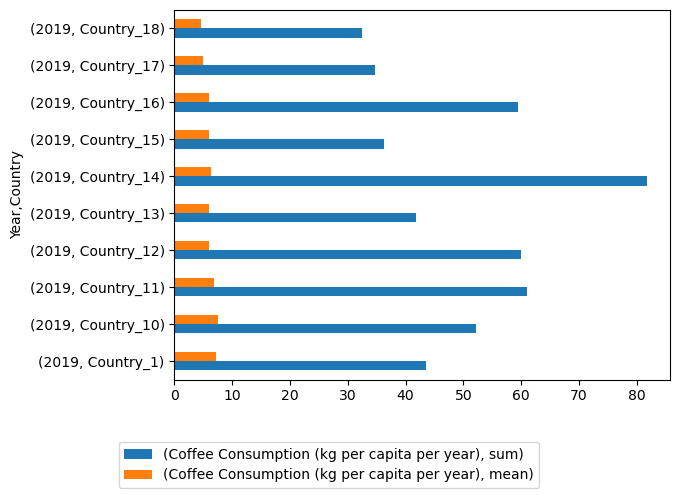

In [7]:
# Konsumsi kopi di tahun 2019 dibeberapa negara

df.loc[df['Year'] == 2019].groupby(['Year', 'Country']).agg({'Coffee Consumption (kg per capita per year)': ['sum', 'mean']}).head(10).plot(kind='barh').legend(bbox_to_anchor=(0.75,-0.15))

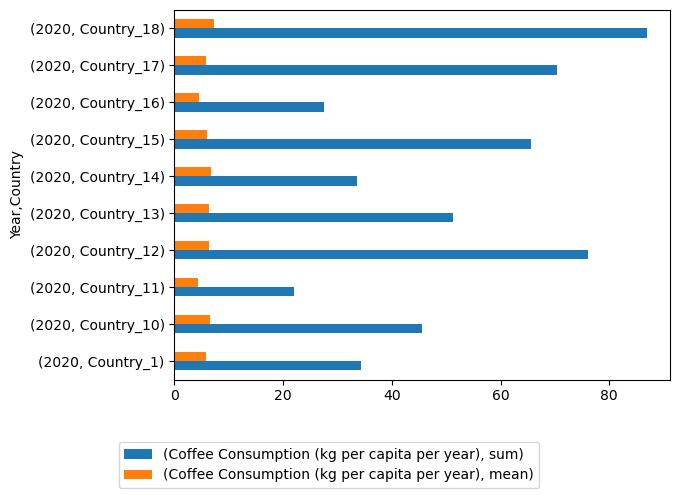

In [8]:
# Konsumsi kopi di tahun 2020 dibeberapa negara

df.loc[df['Year'] == 2020].groupby(['Year', 'Country']).agg({'Coffee Consumption (kg per capita per year)': ['sum', 'mean']}).head(10).plot(kind='barh').legend(bbox_to_anchor=(0.75,-0.15))

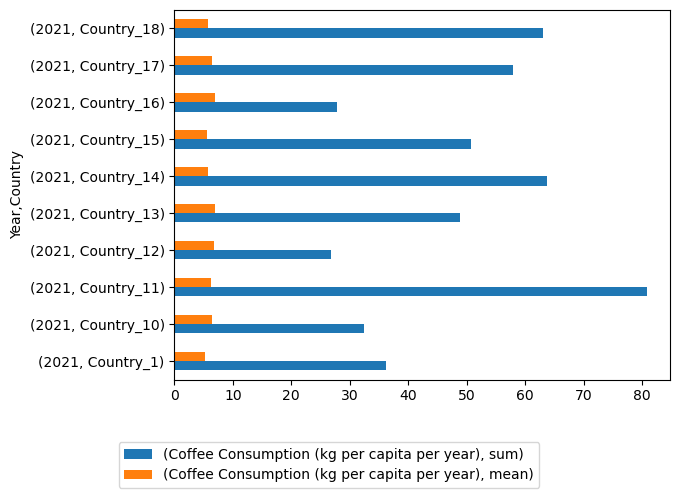

In [9]:
# Konsumsi kopi di tahun 2021 dibeberapa negara

df.loc[df['Year'] == 2021].groupby(['Year', 'Country']).agg({'Coffee Consumption (kg per capita per year)': ['sum', 'mean']}).head(10).plot(kind='barh').legend(bbox_to_anchor=(0.75,-0.15))

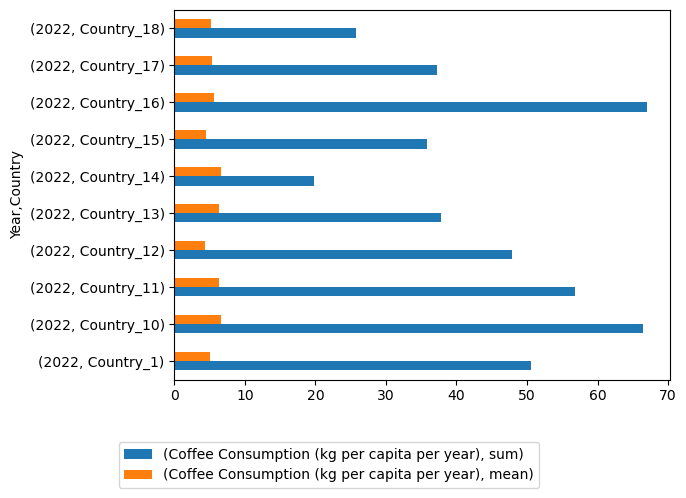

In [10]:
# Konsumsi kopi di tahun 2022 dibeberapa negara

df.loc[df['Year'] == 2022].groupby(['Year', 'Country']).agg({'Coffee Consumption (kg per capita per year)': ['sum', 'mean']}).head(10).plot(kind='barh').legend(bbox_to_anchor=(0.75,-0.15))

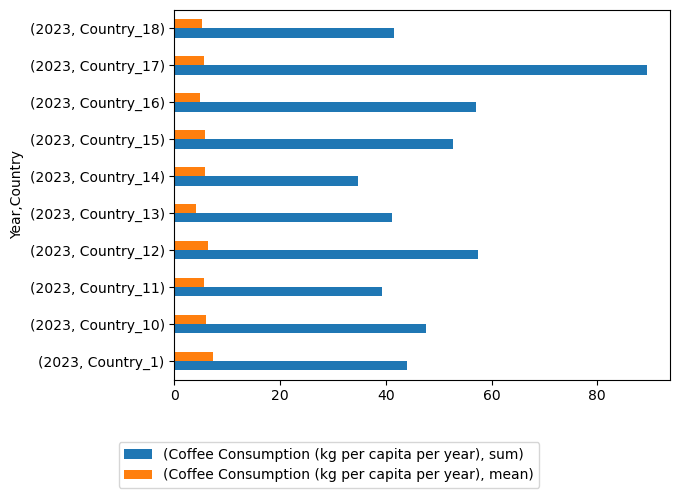

In [11]:
# Konsumsi kopi di tahun 2023 dibeberapa negara

df.loc[df['Year'] == 2023].groupby(['Year', 'Country']).agg({'Coffee Consumption (kg per capita per year)': ['sum', 'mean']}).head(10).plot(kind='barh').legend(bbox_to_anchor=(0.75,-0.15))

Dapat dilihat bahwa jumlah konsumsi kopi di tahun 2019 sampai 2023 di beberapa negara cukup beragam. Salah satu contohnya di tahun 2021, jumlah konsumsi kopi paling banyak ada di country_11 sebesar kurang lebih 80kg dan paling sedikit ada di country_12 seberas kurang lebih 28kg. Rata-rata konsumsi di tahun 2021 memiliki kemiripan dari satu country ke country yang lainnya sehingga dapat disimpulkan bahwa rata-rata konsumsi kopi sebesar kurang lebih 5 sampai 8 kg ditahun 2021

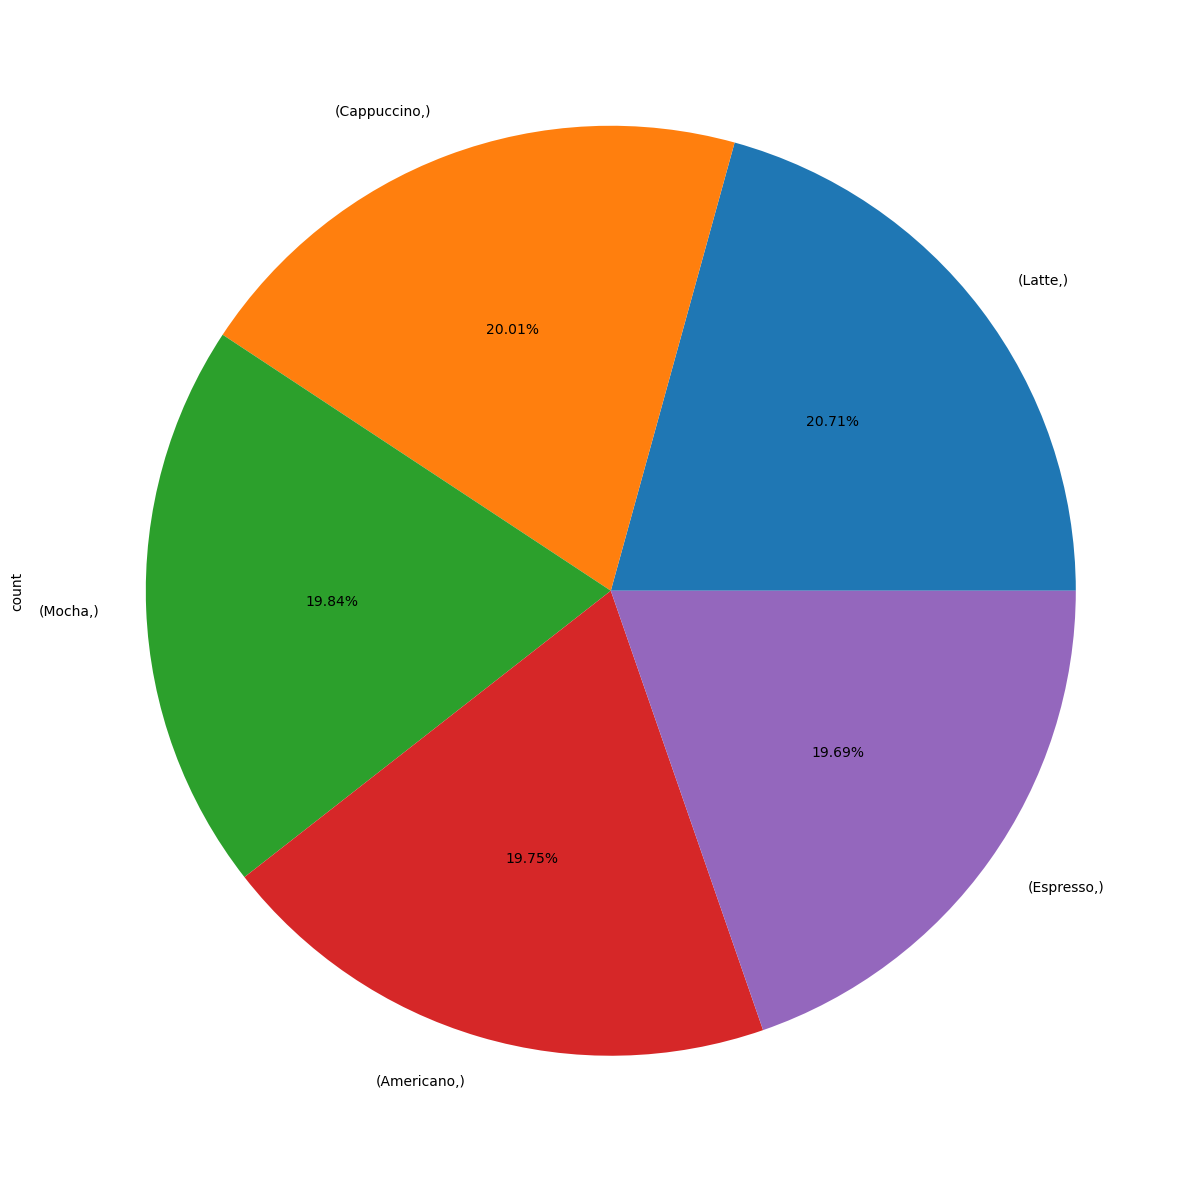

In [12]:
fig,ax1 = plt.subplots(figsize=(15, 18))

df.value_counts(['Type of Coffee Consumed']).plot(kind='pie', autopct='%.2f%%', ax=ax1)
plt.show()

Grafik diatas menunjukkan visualisasi dari seluruh jenis kopi, dari grafik ini bisa terlihat urutan dari yang paling digemari hingga yang kurang digemari untuk dikonsumsi

# Feature Engineering

In [13]:
# Skeweness Range

df['Coffee Consumption (kg per capita per year)'].skew()

-0.03906367122514104

Outputnya menunjukan bahwa data dari konsumsi kopi ternyata terdistribusi normal karena angka yang dihasilkan dari pengecekan skeweness range ada diantara -0,5 dan 0,5 sehingga bisa dilakukan z-score test

In [14]:
# mencari batas atas dan batas bawah dengan rata-rata dan standar deviasi

avg = df['Coffee Consumption (kg per capita per year)'].mean()
std = df['Coffee Consumption (kg per capita per year)'].std()

up_bound = avg + 3*std
low_bound = avg - 3*std

print(f'Batas Atas: {up_bound:.2f}' )
print(f'Batas Bawah: {low_bound:.2f}')

Batas Atas: 13.00
Batas Bawah: -0.88


In [15]:
outlier = df['Coffee Consumption (kg per capita per year)'][(df['Coffee Consumption (kg per capita per year)']<low_bound) | (df['Coffee Consumption (kg per capita per year)']>up_bound)]
no_outlier = df['Coffee Consumption (kg per capita per year)'][(df['Coffee Consumption (kg per capita per year)']>=low_bound) & (df['Coffee Consumption (kg per capita per year)']<=up_bound)]

print('Persentasi outlier: {0:.2f}%'.format(len(outlier)*100/len(df['Coffee Consumption (kg per capita per year)'])))

Persentasi outlier: 0.00%


Setelah dicek, ternyata data konsumsi kopi per tahun nya tidak memiliki outlier. Datanya terdistribusi normal dengan batas atasnya 13 dan batas bawahnya -0.88, hal ini dapat dibuktikan dengan visualisasi dibawah ini

<Axes: >

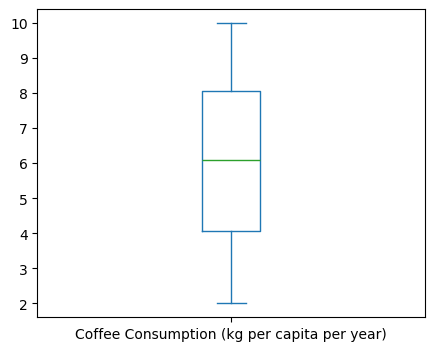

In [16]:
fig, ax = plt.subplots(figsize=(5,4))

no_outlier.plot(kind='box')

Terlihat dalam boxplotnya tidak ada outliers sesuai dengan hasil persentase outliernya yaitu 0%

In [17]:
# Rata-rata USD dari setiap konsumsi kopi per tahun diseluruh negara

df.groupby(['Year', 'Country']).agg({'Average Coffee Price (USD per kg)': ['sum', 'mean']})

Average Coffee Price (USD per kg)           
                                              sum       mean
Year Country                                                
2000 Country_1                         110.469252  10.042659
     Country_10                         18.269506   9.134753
     Country_11                         21.690414   7.230138
     Country_12                         71.810961   8.976370
     Country_13                         70.410480  10.058640
...                                           ...        ...
2023 Country_50                        101.193956   9.199451
     Country_6                          52.330829   8.721805
     Country_7                          77.198852   9.649856
     Country_8                          88.062023   8.806202
     Country_9                         123.561577  11.232871

[1199 rows x 2 columns]

Kolom diatas menunjukan Average Coffee Price (USD per kg) yang sudah dijumlahkan dan dirata-ratakan berdasarkan tahun dan negara-negaranya

In [18]:
# Menghitung rentang atau range
range = df['Average Coffee Price (USD per kg)'].max() - df['Average Coffee Price (USD per kg)'].min()

print('Rentang rata-rata harga kopi: {:.2f} USD'.format(range))
print('Rentang rata-rata harga kopi dari: ', df['Average Coffee Price (USD per kg)'].min(), 'USD', 'sampai', df['Average Coffee Price (USD per kg)'].max(), 'USD')

Rentang rata-rata harga kopi: 11.00 USD
Rentang rata-rata harga kopi dari:  4.000742474112319 USD sampai 14.997052927252396 USD


Rentang rata-rata yang dikeluarkan untuk mengonsumsi kopi sebesar 11 USD sedangkan rata-rata minimum yang dikeluarkan adalah 4 USD dan rata-rata maksimumnya sebesar 14 USD. Untuk lebih detailnya, berikut akan ditampilkan grafik mengenai rata-rata harga kopi dan jumlah rata-rata harga kopi per tahun di seluruh negara

Text(0.5, 1.0, 'Sum of AVG Coffee Price')

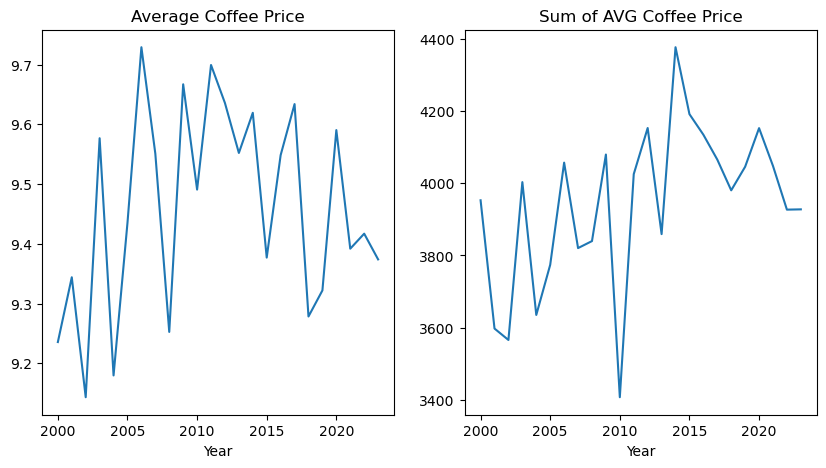

In [19]:
fig, ax = plt.subplots(ncols=2,figsize=(10, 5))

data1 = df.groupby(['Year'])['Average Coffee Price (USD per kg)'].mean().plot(kind='line', ax=ax[0])
data2 = df.groupby(['Year'])['Average Coffee Price (USD per kg)'].sum().plot(kind='line', ax=ax[1])

ax[0].set_title('Average Coffee Price')
ax[1].set_title('Sum of AVG Coffee Price')

Terlihat bahwa rata-rata harga kopi sangat fluktuatif dari tahun ke tahun sedangkan jumlah harga rata-rata kopi mengalami kenaikan walaupun tidak terlalu signifikan dan sempat mengalami penurunan drastis di tahun 2010. Hal ini tentu saja dapat dipengaruhi oleh country tempat kopi tersebut dijual dan seberapa banyak populasi yang mengonsumsi kopi di negara tersebut

In [20]:
# Skewness range

df['Average Coffee Price (USD per kg)'].skew()

0.01875214375364488

Output dari skewness range average coffee price menunjukan bahwa data dari rata-rata harga kopi ternyata terdistribusi normal, sama seperti kolom coffee consumption, karena angka yang dihasilkan dari pengecekan skeweness range ada diantara -0,5 dan 0,5 sehingga bisa dilakukan z-score test

In [21]:
# Mencari batas atas dan batas bawah dengan rata-rata dan standar deviasi

avg = df['Average Coffee Price (USD per kg)'].mean()
std = df['Average Coffee Price (USD per kg)'].std()

up_bound = avg + 3*std
low_bound = avg - 3*std

print(f'Batas Atas: {up_bound:.2f}' )
print(f'Batas Bawah: {low_bound:.2f}')

Batas Atas: 18.92
Batas Bawah: 0.01


In [22]:
outlier = df['Average Coffee Price (USD per kg)'][(df['Average Coffee Price (USD per kg)']<low_bound) | (df['Average Coffee Price (USD per kg)']>up_bound)]
no_outlier = df['Average Coffee Price (USD per kg)'][(df['Average Coffee Price (USD per kg)']>=low_bound) & (df['Average Coffee Price (USD per kg)']<=up_bound)]

print('Persentasi outlier: {0:.2f}%'.format(len(outlier)*100/len(df['Average Coffee Price (USD per kg)'])))

Persentasi outlier: 0.00%


<Axes: >

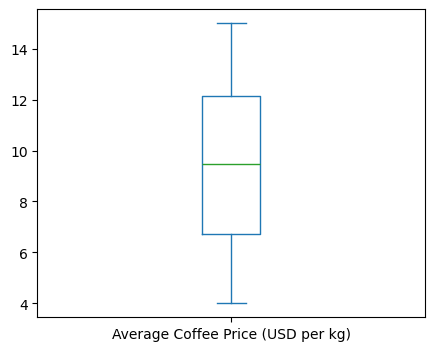

In [23]:
fig, ax = plt.subplots(figsize=(5,4))

no_outlier.plot(kind='box')

Sama seperti data konsumsi kopi, rata-rata harga kopi juga tidak memiliki outlier. batas atasnya sendiri sebesar 18.9 dan batas bawah 0.01

In [24]:
# Kopi yang paling banyak dikonsumsi per negara di tahun 2000 sampai dengan 2023

df.groupby(['Year','Country']).value_counts(['Type of Coffee Consumed'])

Year  Country    Type of Coffee Consumed
2000  Country_1  Cappuccino                 3
                 Latte                      3
                 Americano                  2
                 Espresso                   2
                 Mocha                      1
                                           ..
2023  Country_8  Mocha                      1
      Country_9  Latte                      4
                 Mocha                      4
                 Americano                  2
                 Cappuccino                 1
Name: count, Length: 4860, dtype: int64

Disini kita dapat melihat jenis kopi yang paling banyak diminati di negara-negara tertentu berdasarkan tahun. Contohnya seperti country_1 di tahun 2000 ternyata cappucino dan latter yang menjadi favoritnya dibandingkan dengan americano, espresso dan mocha. Disisi lain pada tahun 2023 di country_9, latte dan mocha yang paling lebih sering dikonsumsi dibandingkan dengan americano dan cappucino

In [25]:
# Jenis kopi yang paling banyak disukai diseluruh dunia sepanjang tahun 2000 sampai dengan 2023

df.value_counts(['Type of Coffee Consumed'])

Type of Coffee Consumed
Latte                      2071
Cappuccino                 2001
Mocha                      1984
Americano                  1975
Espresso                   1969
Name: count, dtype: int64

Ternyata secara keseluruhan dari tahun 2000 sampai dengan 2023, kopi yang paling sering dikonsumsi adalah latte dan yang terakhir adalah espresso. Data ini mencakup 50 negara yang dimana populasinya gemar mengonsumsi kopi. Output tersebut akan dibuktikan dengan .mode()[0]

In [26]:
# Membuktikan .value_counts() dari 'Type of Coffee Consumed' = Latte

df['Type of Coffee Consumed'].mode()[0]

'Latte'

Hasil dari query diatas sama dengan query sebelumnya yang menunjukkan bahwa latte adalah kopi yang sering dikonsumsi

In [27]:
# Jumlah populasi di country_15 yang mengonsumsi kopi

print('Jumlah populasi country_15 :', df[df['Country'] == 'Country_15']['Population (millions)'].sum(), 'orang')


Jumlah populasi country_15 : 16304 orang


Dari output diatas terlihat bahwa ada 16304 orang di country_15 yang mengonsumsi kopi 

Selanjutnya akan dicari hubungan antara dua variabel yang berkaitan dengan :

H0 = Ada hubungan antara type of coffee consumed dengan country<br/>
H1 = Tidak ada hubungan antara type of coffee consumed dengan country

Dengan menggunakan chi-square test, selanjutnya akan dicari p-valuenya apakah H0 diterima atau tidak

In [28]:
# Chi-Square test

contingency_table = pd.crosstab(df['Country'], df['Type of Coffee Consumed'])
contingency_table.head()

Type of Coffee Consumed,Americano,Cappuccino,Espresso,Latte,Mocha
Country,,,,,
Country_1,39,33,25,42,42
Country_10,36,33,36,41,37
Country_11,39,41,40,32,43
Country_12,43,48,41,36,39
Country_13,35,33,50,40,50


In [29]:
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.3685970242942431


Hasil P-value adalah 0.36 lebih besar dari critical value 0,05 yang berarti H0 failed to reject sehingga adanya hubungan antara type of coffee consumed dengan country

# Conclusion

Potensi untuk menjalankan bisnis kopi sampai ke mancanegara cukuplah besar karena :
1. Dari tahun ke tahun kopi yang dikonsumsi di 50 country/negara menunjukan jumlah yang naik cukup signifikan termasuk rata-rata konsumsi kopi cenderung stabil walaupun cukup fluktuatif tapi ini menandakan bahwa *demand* untuk kopi itu sendiri tetap terus ada.
2. Harga kopi yang ditawarkan pun cukup bervariatif tapi ada potensi untuk dapat menjual dengan harga yang kompetitif karena rata-rata harga kopi yang dikonsumsi dari 50 negara sebesar 11 USD.
3. Agar bisnis mendapatkan profit disarankan untuk menjual kopi dengan jenis latte, cappucino atau mocha karena 3 jenis kopi tersebut yang paling sering dikonsumsi tergantung penjualannya akan di laksanakan di country yang mana mengingat ada hubungan antara jenis kopi dengan country

Dengan ini disimpulkan bahwa penjualan kopi baik berupa barang mentah atau jadi memiliki potensi besar, contohnya : melakukan ekspor biji kopi ke berbagai negara. Jika hal ini dapat terlaksana, maka analisis selanjutnya yang dapat dilakukan yaitu dengan menganalisis seberapa banyak petani kopi yang ada di Indonesia dan layak untuk dijadikan produsen utama